In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [24]:
# Loading the Data set
df = pd.read_csv("Auto.csv",na_values ='?')

In [25]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Data set description

**Variable** | **__ Description__** |** Type**
---|---|---
mpg|Miles Per Gallon|Integer
cylinders|Number of cylinders between 4 and 8|Integer
displacement|Engine Displacement,Cu Inches|Integer
horsepower|Horsepower|Integer
weight|Vehicle weight(lbs)|Integer
acceleration|Time to accelerate from 0 to 60 mph (Secs)|float
year|Model year|Year of the Model
origin|Origin of car (1. American, 2. European, 3. Japanese|qualitative
name|Vehicle Name|String


- Dependent variable- mpg 
- Problem - to predict when mpg is greater than the median value 

In [27]:
df = df.dropna(axis = 0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [29]:
# Create a new feature mpg01 and initialize it to 0
df['mpg01'] = 0


In [30]:
# Med mpg hold median value for the gas mileage
med_mpg = df.mpg.median()
# change the feature 
df.loc[(df.mpg > med_mpg ) , 'mpg01'] = 1

In [31]:
df.mpg01.value_counts()

1    196
0    196
Name: mpg01, dtype: int64

### Exploratory Data Analysis

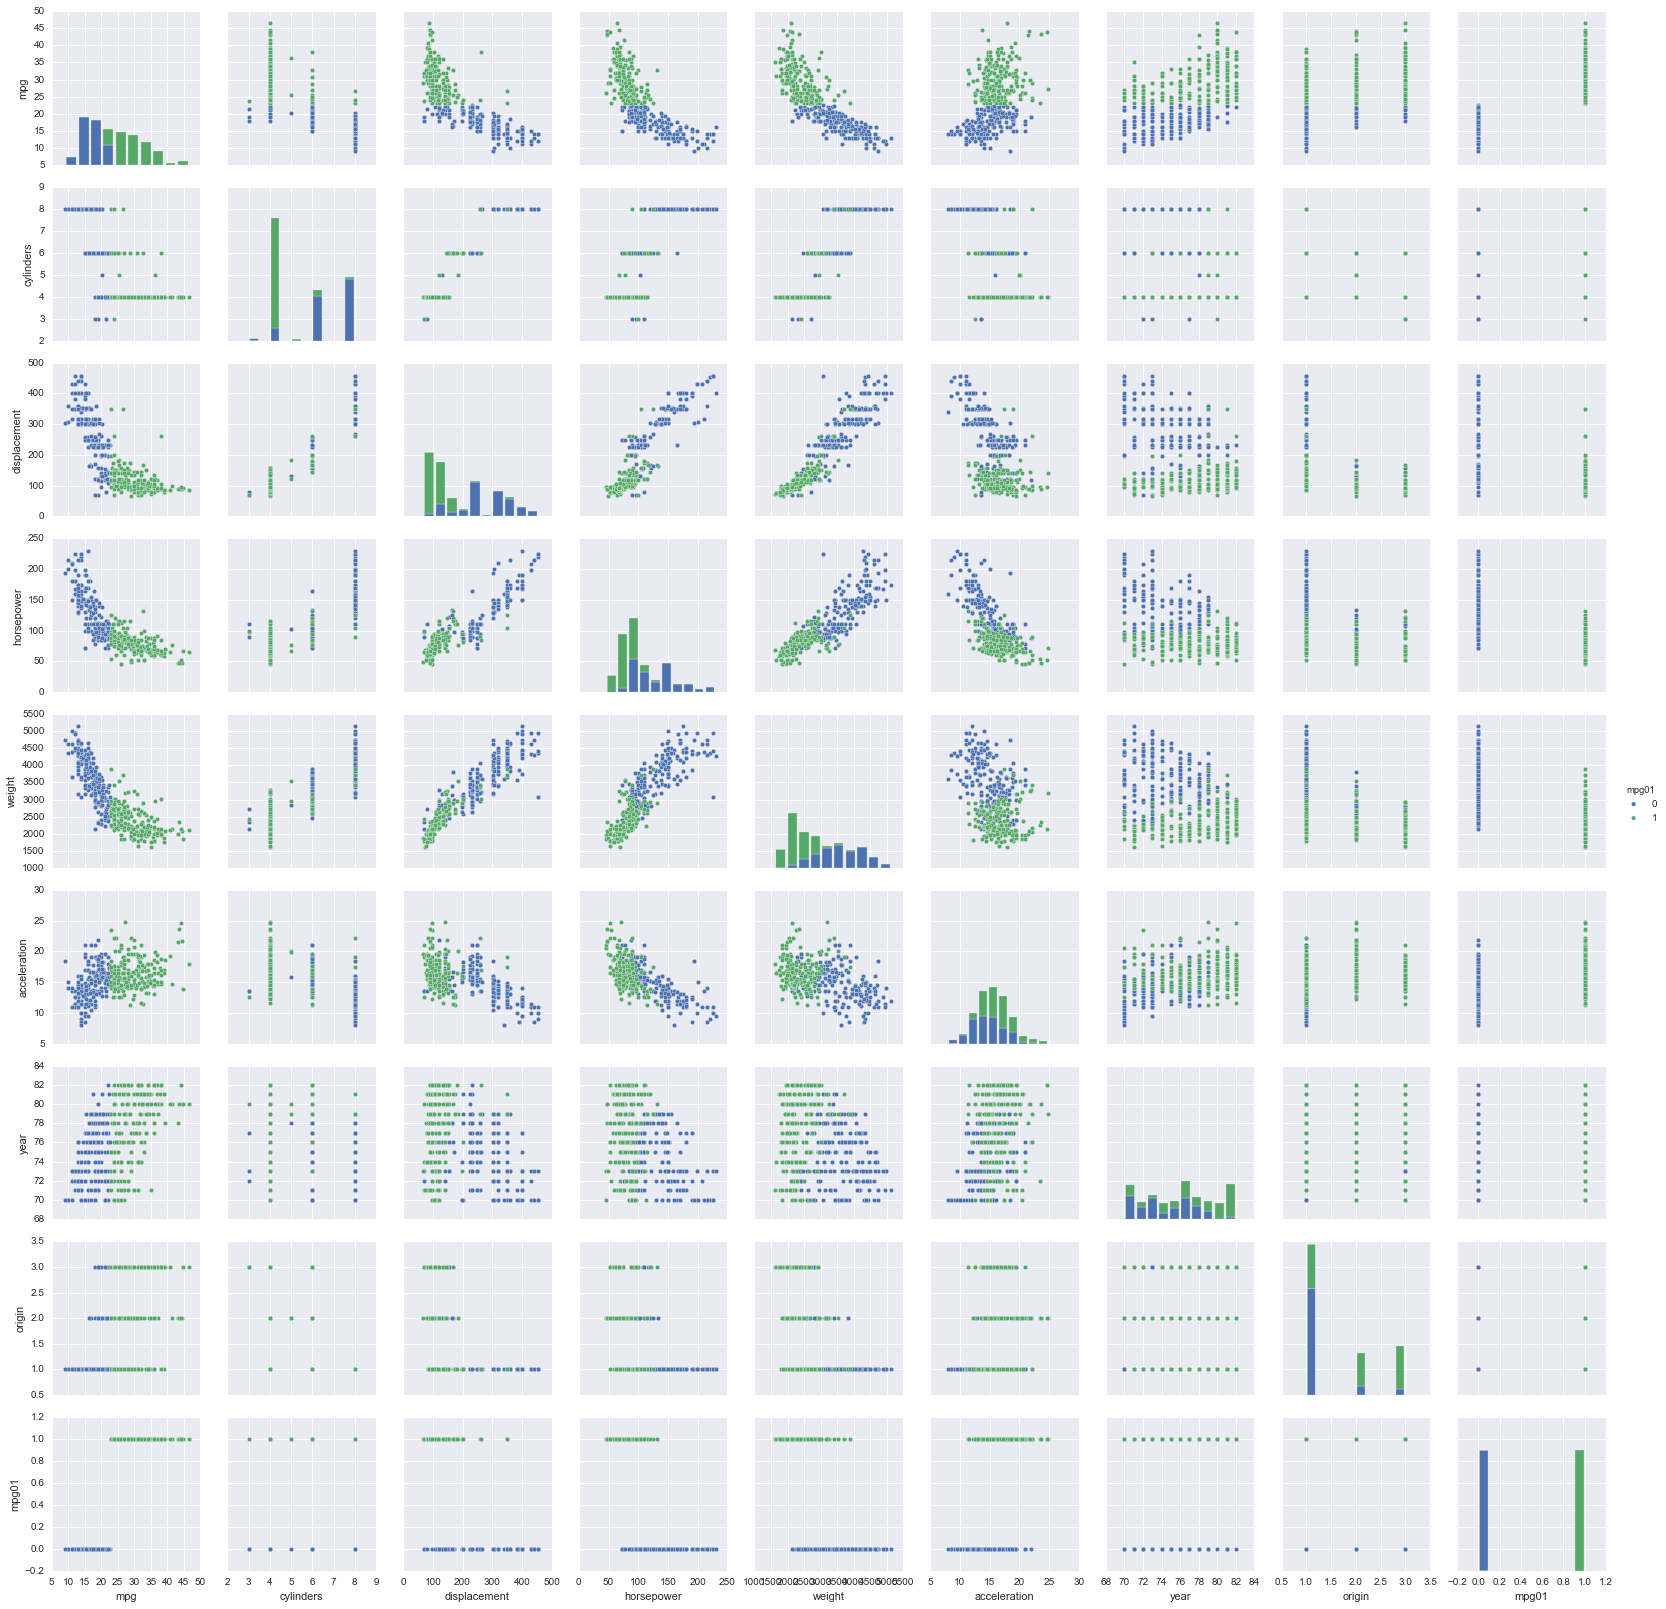

In [32]:
sns.pairplot(data = df , hue = 'mpg01')

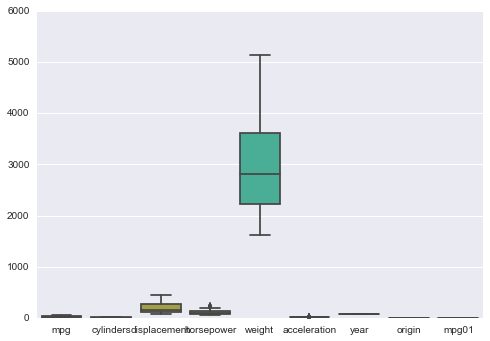

In [34]:
sns.boxplot(data = df)

In [49]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


Note:
- Displeacement, Horsepower and weight have approximately similar distribution againt mpg
- There is a high degree of coorelation between these varibales which means much of their relationship with mpg can be catpured by including fewer features
- A potential strategy could be to to use weight(as it has the max corelation with mpg) and drop cylinder,HP and displacement

### Defining resonse and Predictor variables and Modeling

In [50]:
X = df.drop(['name','mpg01','cylinders','horsepower','displacement'],axis=1)
y = df.mpg01


In [51]:
X.head()

,mpg,weight,acceleration,year,origin
0,18.0,3504,12.0,70,1
1,15.0,3693,11.5,70,1
2,18.0,3436,11.0,70,1
3,16.0,3433,12.0,70,1
4,17.0,3449,10.5,70,1


In [57]:
logit = sm.Logit(y,X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.049934
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  392
Model:                          Logit   Df Residuals:                      387
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Sep 2016   Pseudo R-squ.:                  0.9280
Time:                        06:02:05   Log-Likelihood:                -19.574
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                7.953e-108
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mpg              2.8706      0.779      3.684      0.000         1.343     4.398
weight           0.0008      0.001      0.568      0.570        -0.002     0.003
acceleration    -0.4290      0.191     -2.248      0.025        -0.803    -0.055
year            -0.7856      0.232     -3.384      0.001        -1.241    -0.331
origin          -0.3920      0.602     -0.651      0.515        -1.571     0.787
================================================================================
"""

- below are the finidings from the Logit model
    - the Null hypothesis , H0,is true for weight,origin
    - 


In [58]:
X_new = X.drop(['weight','origin'],axis = 1)

In [61]:
# train,test split
train_X,test_X,train_y,test_y = cross_validation.train_test_split(X_new , y , test_size = .2)

In [69]:
#fitting a logit model
model_logit = linear_model.LogisticRegression().fit(train_X,train_y)
model_logit.score(train_X,train_y)


0.97124600638977632

In [71]:
cv_score = cross_validation.cross_val_score(model_logit,train_X,train_y,cv=10).mean()
print cv_score

0.968037634409


In [74]:
y_hat_test = model_logit.predict(test_X)

In [73]:
model_logit.score(test_X,test_y)

0.97468354430379744

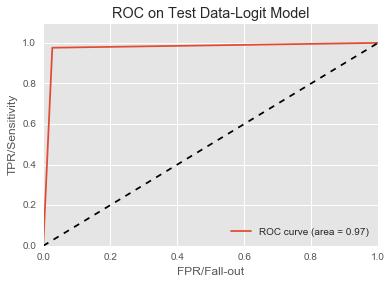

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_hat_test)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("ROC on Test Data-Logit Model")
plt.legend(loc = 'lower right')
plt.show()

#### Modeling - LDA

In [82]:
# trying LDA to evalute the quality of the fit
model_lda = discriminant_analysis.LinearDiscriminantAnalysis()
model_lda.fit(train_X,train_y)
model_lda.score(train_X , train_y)

0.96805111821086265

In [85]:
cv_score_lda = cross_validation.cross_val_score(model_lda,train_X,train_y,cv=10).mean()
print cv_score_lda

0.964811827957


In [86]:
y_hat_test_lda = model_lda.predict(test_X)

In [87]:
model_lda.score(test_X , test_y)

0.92405063291139244

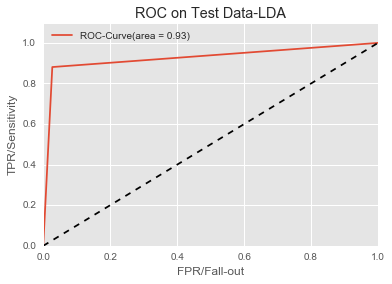

In [103]:
fpr , tpr , threshold = metrics.roc_curve(test_y , y_hat_test_lda)
plt.figure()
plt.plot(fpr,tpr,label='ROC-Curve(area = %.2f)' %metrics.auc(fpr, tpr))
plt.plot([0,1],[0,1],'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("ROC on Test Data-LDA")

plt.legend(loc='best')

#### Modeling - QDA

In [104]:
# trying LDA to evalute the quality of the fit
model_qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
model_qda.fit(train_X,train_y)
model_qda.score(train_X , train_y)

0.96485623003194887

In [109]:
# 10 folds CV
cv_score_qda = cross_validation.cross_val_score(model_qda,train_X,train_y,cv=10).mean()
print cv_score_qda

0.964711021505


In [106]:
y_hat_test_qda = model_qda.predict(test_X)

In [107]:
model_qda.score(test_X , test_y)

0.98734177215189878

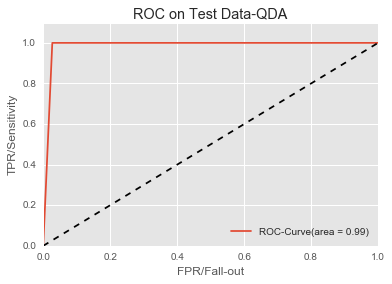

In [110]:
fpr , tpr , threshold = metrics.roc_curve(test_y , y_hat_test_qda)
plt.figure()
plt.plot(fpr,tpr,label='ROC-Curve(area = %.2f)' %metrics.auc(fpr, tpr))
plt.plot([0,1],[0,1],'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("ROC on Test Data-QDA")

plt.legend(loc='best')

####  *************************            Modeling KNN**********************************************

In [124]:
df_eval = pd.DataFrame({'K':np.nan,'Train_Score':np.nan,'CV_score':np.nan},index=[0])

In [125]:
for i in range(1,11):
    model_knn = neighbors.KNeighborsClassifier(n_neighbors = i ).fit(train_X , train_y)
    tr_score = model_knn.score(train_X , train_y)
    cv_fold_score = cross_validation.cross_val_score(model_knn,train_X , train_y,cv=10).mean()
    df_eval.loc[i-1 , 'K'] = i
    df_eval.loc[i-1 , 'Train_Score'] = tr_score
    df_eval.loc[i-1 , 'CV_score'] = cv_fold_score
    

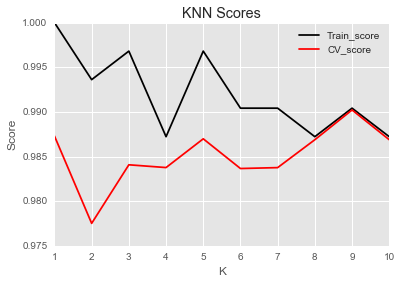

In [126]:
plt.plot(df_eval.K , df_eval.Train_Score,'k',label='Train_score')
plt.plot(df_eval.K , df_eval.CV_score,'r',label='CV_score')
plt.legend(loc = 'best')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('KNN Scores')

KNN Observations:
- Knn with K =5 and K =9 seem to perform best
- KNN with K= 5 should perform better due to the following:
     - simplility
     - The decision boundary seems to be non-linear from QDA's prediction accuracy and K =9 would tend to become more linear
     - There is not much difference in the prediction accurary(98.5 % V/S 99%)

In [132]:
model_knn_5 = neighbors.KNeighborsClassifier(n_neighbors = 5 ).fit(train_X , train_y)
y_hat_knn = model_knn_5.predict(test_X)

In [133]:
model_score = pd.DataFrame({'Model':np.nan,'score':np.nan},index=[0])

In [144]:
model_score.loc[0 , 'Model'] = 'Logistic'
model_score.loc[0 , 'score'] = model_logit.score(test_X , test_y)

model_score.loc[1 , 'Model'] = 'LDA'
model_score.loc[1 , 'score'] = model_lda.score(test_X , test_y)

model_score.loc[2 , 'Model'] = 'QDA'
model_score.loc[2 , 'score'] = model_qda.score(test_X , test_y)

model_score.loc[3 , 'Model'] = 'KNN_5'
model_score.loc[3 , 'score'] = model_knn_5.score(test_X , test_y)

In [145]:
model_score

,Model,score
0,Logistic,0.974684
1,LDA,0.924051
2,QDA,0.987342
3,KNN_5,0.987342


([<matplotlib.axis.XTick at 0x1387d2210>,
 <a list of 4 Text xticklabel objects>)

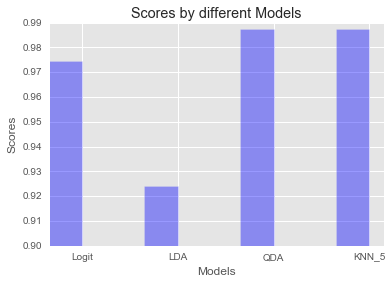

In [177]:

fig, ax = plt.subplots()
n_groups = 4 # for each of the Model score

y_labs = model_score.score
index = model_score.index
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, y_labs, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Modeling_Scores')

plt.ylim([.90 , .99])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Scores by different Models')
plt.xticks(index + bar_width, ('Logit', 'LDA', 'QDA', 'KNN_5'))
#plt.legend()
